## Intro to Regression

[intro desmos](https://www.desmos.com/calculator/ywloazwete)

Goals:
- use statsmodels to build a regression model
- use summary statistics to evaluate a model
- differentiate between corr, cov, and R squared

In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

`.cov` , `.corr`

[link to dataset](https://raw.githubusercontent.com/chasinginfinity/ml-from-scratch/master/03%20Linear%20Regression%20in%202%20minutes/data.csv)

In [7]:
class_data = pd.read_csv("https://raw.githubusercontent.com/chasinginfinity/ml-from-scratch/master/03%20Linear%20Regression%20in%202%20minutes/data.csv", header=None)

In [11]:
class_data.head()

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [9]:
class_data.columns = ["X","Y"]

In [15]:
class_data.describe()

,X,Y
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


In [16]:
class_data.corr()

,X,Y
X,1.000000,0.773728
Y,0.773728,1.000000


In [17]:
class_data.cov()

,X,Y
X,94.991910,125.620248
Y,125.620248,277.495208


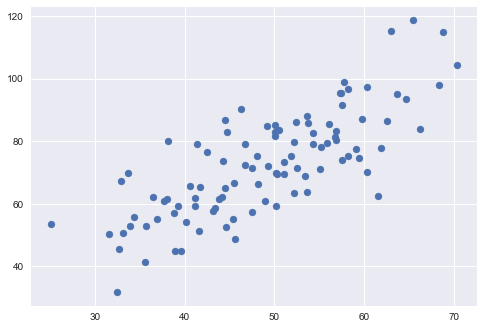

In [19]:
plt.scatter(class_data.X, class_data.Y)

In [25]:
f = "Y~X" # formula: can you predict Y by X

In [26]:
model = ols(formula=f, data=class_data).fit()

In [28]:
model.summary()
# when using only one variable, use r squared
# when using multiple variables, use adjusted r squared
# adjusted r squared can varied depends on different field
# 60% of the variance can be explained by the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     146.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.86e-21
Time:                        14:54:22   Log-Likelihood:                -377.03
No. Observations:                 100   AIC:                             758.1
Df Residuals:                      98   BIC:                             763.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9910      5.459      1.464      0.146      -2.842      18.824
X              1.3224      0.109     12.090      0.000       1.105       1.539
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.808
Skew:                           0.148   Prob(JB):                        0.668
Kurtosis:                       2.674   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Beginner
### Problem One: Chopsticks
#### Is chopstick length correlated with effectiveness?

In [35]:
chopsticks = pd.read_csv("http://blog.yhat.com/static/misc/data/chopstick-effectiveness.csv")

In [36]:
chopsticks.head()

,Food.Pinching.Effeciency,Individual,Chopstick.Length
0,19.55,1,180
1,27.24,2,180
2,28.76,3,180
3,31.19,4,180
4,21.91,5,180


In [37]:
chopsticks.corr()

,Food.Pinching.Effeciency,Individual,Chopstick.Length
Food.Pinching.Effeciency,1.000000,-0.245126,-0.099603
Individual,-0.245126,1.000000,0.000000
Chopstick.Length,-0.099603,0.000000,1.000000


In [39]:
X = chopsticks['Chopstick.Length']
Y = chopsticks['Food.Pinching.Effeciency']

In [40]:
f = "Y~X"
model = ols(formula=f, data=chopsticks).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.844
Date:                Mon, 26 Aug 2019   Prob (F-statistic):              0.176
Time:                        15:07:56   Log-Likelihood:                -522.18
No. Observations:                 186   AIC:                             1048.
Df Residuals:                     184   BIC:                             1055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.0028      1.500     17.998      0.000      24.043      29.963
X             -0.0078      0.006     -1.358      0.176      -0.019       0.004
==============================================================================
Omnibus:                        1.652   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.737
Skew:                          -0.207   Prob(JB):                        0.420
Kurtosis:                       2.771   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Link to chopsticks study](https://www.ncbi.nlm.nih.gov/pubmed/15676839)

## Intermediate:
### Problem Three: Street price of weed
[reference](http://blog.yhat.com/posts/7-funny-datasets.html)

Has the price of weed been trending downward or upward over time? 
- overall?
- different in certain states?
- different qualities?

In [56]:
weed = pd.read_csv("http://blog.yhat.com/static/misc/data/marijuana-street-price-clean.csv")

In [57]:
weed.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


In [58]:
weed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22899 entries, 0 to 22898
Data columns (total 8 columns):
State     22899 non-null object
HighQ     22899 non-null float64
HighQN    22899 non-null int64
MedQ      22899 non-null float64
MedQN     22899 non-null int64
LowQ      12342 non-null float64
LowQN     22899 non-null int64
date      22899 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 1.4+ MB


In [60]:
weed.corr()

,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
HighQ,1.000000,-0.234430,0.500543,-0.246342,-0.073180,-0.073394
HighQN,-0.234430,1.000000,-0.212044,0.987426,-0.126627,0.915216
MedQ,0.500543,-0.212044,1.000000,-0.194817,0.270775,-0.228068
MedQN,-0.246342,0.987426,-0.194817,1.000000,-0.114063,0.895932
LowQ,-0.073180,-0.126627,0.270775,-0.114063,1.000000,-0.195083
LowQN,-0.073394,0.915216,-0.228068,0.895932,-0.195083,1.000000


In [59]:
weed.groupby('date').HighQ.mean()

date
2013-12-27    335.498039
2013-12-28    335.494902
2013-12-29    335.582941
2013-12-30    335.490196
2013-12-31    335.505098
2014-01-01    335.475098
2014-01-02    335.478431
2014-01-03    335.432941
2014-01-04    335.424118
2014-01-05    335.370196
2014-01-06    335.387451
2014-01-07    335.400588
2014-01-08    335.398824
2014-01-09    335.318235
2014-01-10    335.231569
2014-01-11    335.189608
2014-01-12    335.219216
2014-01-13    335.453922
2014-01-14    335.373922
2014-01-15    335.357451
2014-01-16    335.389412
2014-01-17    335.388431
2014-01-18    335.339020
2014-01-19    335.364706
2014-01-20    335.374902
2014-01-21    335.301373
2014-01-22    335.135098
2014-01-23    335.065490
2014-01-24    334.996667
2014-01-25    334.911765
                 ...    
2015-05-13    323.048824
2015-05-14    322.985686
2015-05-15    322.803922
2015-05-16    322.713333
2015-05-17    322.685098
2015-05-18    322.555686
2015-05-19    322.540196
2015-05-20    322.454706
2015-05-21    322.43

In [68]:
weed.date = pd.to_datetime(weed.date)

In [51]:
weed = weed.set_index('date')
# bike = bike.set_index('dteday')

In [52]:
weed.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
date,,,,,,,
2014-01-01,Alabama,339.06,1042,198.64,933,149.49,123
2014-01-01,Alaska,288.75,252,260.60,297,388.58,26
2014-01-01,Arizona,303.31,1941,209.35,1625,189.45,222
2014-01-01,Arkansas,361.85,576,185.62,544,125.87,112
2014-01-01,California,248.78,12096,193.56,12812,192.92,778


In [54]:
weed.index.value_counts()

2015-05-24    51
2014-05-16    51
2015-01-31    51
2015-05-12    51
2014-06-30    51
2014-10-09    51
2015-01-18    51
2014-03-08    51
2014-06-17    51
2014-09-26    51
2015-01-05    51
2014-02-23    51
2014-06-04    51
2014-09-13    51
2014-12-23    51
2014-02-10    51
2014-05-22    51
2014-08-31    51
2014-12-10    51
2014-01-28    51
2014-05-09    51
2014-08-18    51
2014-11-27    51
2014-01-15    51
2014-04-26    51
2014-08-05    51
2014-11-14    51
2014-10-22    51
2014-07-13    51
2014-04-03    51
              ..
2014-11-25    51
2014-10-20    51
2014-04-01    51
2014-03-09    51
2014-12-11    51
2014-06-18    51
2014-09-27    51
2015-01-06    51
2014-02-24    51
2014-06-05    51
2014-09-14    51
2014-12-24    51
2014-02-11    51
2014-05-23    51
2015-05-25    51
2014-09-01    51
2014-01-29    51
2015-02-11    51
2014-05-10    51
2014-08-19    51
2014-11-28    51
2014-01-16    51
2014-04-27    51
2014-08-06    51
2014-11-15    51
2014-01-03    51
2015-06-05    51
2014-07-24    

## Advanced
### DC housing
### Doing repeat OLS, which variables are related to housing price?

In [61]:
housing = pd.read_csv("https://drive.google.com/uc?export=download&id=1DsbpIf4_9CAKNd-B9gaML1WKOJcMne71")

/Users/yl/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
housing.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [63]:
housing.corr()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
Unnamed: 0,1.000000,-0.378389,-0.358454,-0.051664,-0.585978,-0.598538,0.438398,-0.115391,-0.133335,-0.043577,...,0.299741,-0.207757,0.097378,0.027510,0.141489,-0.210494,0.106993,0.161255,0.106642,-0.211284
BATHRM,-0.378389,1.000000,0.248759,0.403431,0.677751,0.655563,-0.039087,0.239797,0.269444,0.042349,...,0.121070,0.287648,0.213538,0.717903,-0.063410,0.130588,-0.184810,-0.196311,-0.184997,0.129822
HF_BATHRM,-0.358454,0.248759,1.000000,-0.151393,0.353825,0.375568,-0.009372,0.148483,0.235645,0.033270,...,-0.229586,0.212534,0.057939,0.484198,-0.020164,0.126221,-0.058719,-0.072888,-0.058819,0.126238
NUM_UNITS,-0.051664,0.403431,-0.151393,1.000000,0.524724,0.330551,-0.104280,-0.015551,-0.069551,0.019268,...,0.797330,-0.038679,NaN,NaN,-0.099460,-0.117125,0.037280,0.060408,0.037291,-0.117025
ROOMS,-0.585978,0.677751,0.353825,0.524724,1.000000,0.841309,-0.219367,0.161396,0.158847,0.039352,...,-0.042795,0.348184,0.049562,0.761722,-0.053109,0.120238,0.006756,-0.075593,0.006399,0.119712
BEDRM,-0.598538,0.655563,0.375568,0.330551,0.841309,1.000000,-0.242955,0.214655,0.168913,0.040859,...,-0.131676,0.321066,0.146936,0.721204,-0.071962,0.144971,0.028338,-0.072028,0.028024,0.144723
AYB,0.438398,-0.039087,-0.009372,-0.104280,-0.219367,-0.242955,1.000000,0.021678,0.660668,-0.011098,...,0.078079,-0.040503,0.201515,0.117381,0.175098,-0.122697,0.032979,0.115762,0.033361,-0.122607
YR_RMDL,-0.115391,0.239797,0.148483,-0.015551,0.161396,0.214655,0.021678,1.000000,0.256227,-0.001643,...,-0.094586,0.049021,0.546581,0.118424,-0.098040,0.044246,0.145658,0.069060,0.145585,0.044158
EYB,-0.133335,0.269444,0.235645,-0.069551,0.158847,0.168913,0.660668,0.256227,1.000000,0.040214,...,-0.059968,0.081796,0.246490,0.109064,0.041599,-0.082219,0.005107,0.036704,0.005332,-0.082212
STORIES,-0.043577,0.042349,0.033270,0.019268,0.039352,0.040859,-0.011098,-0.001643,0.040214,1.000000,...,0.020700,-0.009711,NaN,NaN,-0.026886,-0.003654,-0.031842,-0.025058,-0.031842,-0.003597
